In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
from datetime import datetime, timedelta
import os

In [ ]:
DB = sqlite3.connect('varlesaldytuvai.db')
C = DB.cursor()
sql="""SELECT * FROM saldytuvai;"""
dfv = pd.read_sql_query(sql, con=DB)
dfv.head(3)

,gamintojas,nuoroda,kaina,tipas,montavimo tipas,energijos klasė,talpa (l),aukštis (cm),spalva,energijos vartojimo efektyvumo klasė (reglamentas (es) 2017/1369),...,dėžutės_aukštis,langelio_plotis,dėžutės_ilgis,door-opening-angle,built-in-freezer,door-open-alarm,kabrioletas-šaldiklis,paruoštas skydeliui pagal užsakymą,šaldiklio-lentynų-krepšelių skaičius,door-balconies-finish-type
0,sharp,/saldytuvai/saldytuvas-sharp-sj-ftb01itxse-eu-...,222.00,su kamera viršuje,laisvai statomi,e,213.0,145.0,None,None,...,None,None,None,None,None,None,None,None,None,None
1,hisense,/saldytuvai/saldytuvas-hisense-rr106d4cbe-85cm...,170.00,mini\n\nsu kamera viduje,laisvai statomi,e,82.0,85.0,juoda,None,...,None,None,None,None,None,None,None,None,None,None
2,bosch,/saldytuvai/imontuojamasis-saldytuvas-bosch-ki...,777.00,su kamera apačioje,įmontuojami,e,76.0,177.0,balta,e,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
DB = sqlite3.connect('pigusaldytuvai.db')
C = DB.cursor()
sql="""SELECT * FROM saldytuvai;"""
dfp = pd.read_sql_query(sql, con=DB)
dfp.head(3)

,nuoroda,kaina,prekės id:,kategorija:,prekės pakuočių kiekis:,pakuotės išmatavimai ir svoris (1):,gamintojo kodas:,šaldytuvo tipas:,rūšis:,energijos klasė:,...,padėklas ledukams:,kita:,keičiama durų kryptis:,lentynos:,žemos temperatūros kamera:,palaikomos technologijos:,star klasė:,kitų skyrių vidaus temperatūra:,energijos sąnaudos:,pakuotės išmatavimai ir svoris (2):
0,https://pigu.lt/lt/saldytuvai/gorenje-rf212epw...,179,80913785,šaldytuvai,1 vnt.,"0,52 x 0,55 x 1,26 m, 29,5 kg",rf212epw4,šaldytuvas su šaldikliu viršuje,"gorenje, šaldytuvas su šaldikliu viršuje šaldy...",e,...,None,None,None,None,None,None,None,None,None,None
1,https://pigu.lt/lt/saldytuvai/beko-rcsa270k40s...,284,76458632,šaldytuvai,1 vnt.,"1,73 x 0,56 x 0,55 m, 58 kg",7519820046,šaldytuvas su šaldikliu apačioje,"beko, šaldytuvas su šaldikliu apačioje šaldytuvai",e,...,taip,led apšvietimas,taip,3,nenurodyta,crispzone,4,10°c / 43°c,None,None
2,https://pigu.lt/lt/saldytuvai/beko-b3rcna364hx...,396,60394178,šaldytuvai,1 vnt.,"0,77 x 0,66 x 1,93 m, 72,5 kg",7524620006,šaldytuvas su šaldikliu apačioje,"beko, šaldytuvas su šaldikliu apačioje šaldytuvai",e,...,None,None,taip,None,nenurodyta,None,None,None,None,None


In [ ]:
dfv['kaina']=dfv['kaina'].astype(float)
dfv = dfv.dropna(subset=['montavimo tipas'])
# dfv = dfv[dfv['montavimo tipas'].notnull() & (dfv['montavimo tipas'] != '')]
dfv['montavimo tipas'] = dfv['montavimo tipas'].apply(lambda x: str(x).replace('laisvai pastatoma', 'laisvai pastatomas'))
dfv['montavimo tipas'] = dfv['montavimo tipas'].apply(lambda x: str(x).replace('laisvai pastatomos', 'laisvai pastatomas'))
dfv['montavimo tipas'] = dfv['montavimo tipas'].apply(lambda x: str(x).replace('laisvai statomi', 'laisvai pastatomas'))
dfv['montavimo tipas'] = dfv['montavimo tipas'].apply(lambda x: str(x).replace('pastatytas', 'laisvai pastatomas'))
dfv['montavimo tipas'] = dfv['montavimo tipas'].apply(lambda x: str(x).replace('įmontuojami', 'laikinas'))
dfv['montavimo tipas'] = dfv['montavimo tipas'].apply(lambda x: str(x).replace('montuojami', 'įmontuojamas'))
dfv['montavimo tipas'] = dfv['montavimo tipas'].apply(lambda x: str(x).replace('laikinas', 'įmontuojamas'))
montipv= dfv.groupby('montavimo tipas')['kaina'].mean().reset_index()

      montavimo tipas       kaina
0  laisvai pastatomas  513.538920
1        įmontuojamas  987.436667


In [ ]:
dfp = dfp.dropna(subset=['kaina'])
dfp['kaina'] = dfp['kaina'].apply(lambda x: str(x).replace(' ', ''))
dfp['kaina']=dfp['kaina'].astype(float)
dfp = dfp.dropna(subset=['montavimo tipas:'])
# dfv = dfv[dfv['montavimo tipas'].notnull() & (dfv['montavimo tipas'] != '')]
# dfp['montavimo tipas'] = dfp['montavimo tipas'].apply(lambda x: str(x).replace('laisvai pastatoma', 'laisvai statomi'))
# dfp['montavimo tipas'] = dfp['montavimo tipas'].apply(lambda x: str(x).replace('laisvai pastatomos', 'laisvai statomi'))
# dfp['montavimo tipas'] = dfp['montavimo tipas'].apply(lambda x: str(x).replace('pastatytas', 'laisvai statomi'))
# dfp['montavimo tipas'] = dfp['montavimo tipas'].apply(lambda x: str(x).replace('įmontuojami', 'laikinas'))
# dfp['montavimo tipas'] = dfp['montavimo tipas'].apply(lambda x: str(x).replace('montuojami', 'įmontuojami'))
# dfp['montavimo tipas'] = dfp['montavimo tipas'].apply(lambda x: str(x).replace('laikinas', 'įmontuojami'))
montipp= dfp.groupby('montavimo tipas:')['kaina'].mean().reset_index()

     montavimo tipas:       kaina
0  laisvai pastatomas  674.840659
1        įmontuojamas  938.455556


In [ ]:
montipp.rename(columns={'montavimo tipas:': 'montavimo tipas'}, inplace=True)
montipp['pardavejas']='pigu.lt'
montipv['pardavejas']='varle.lt'
print(montipp)
print(montipv)
combined_df = pd.concat([montipp, montipv], axis=0, ignore_index=True)

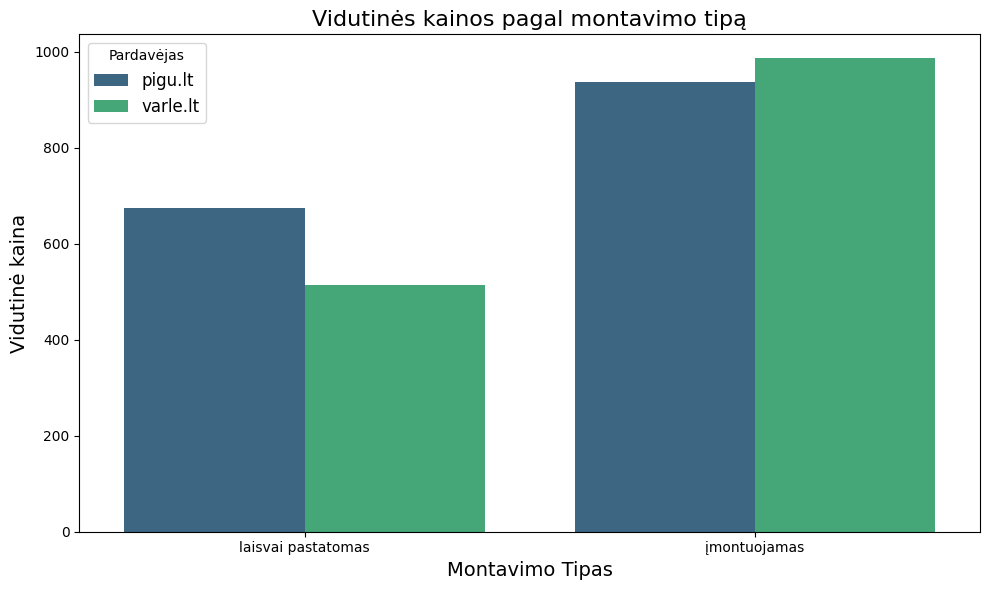

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='montavimo tipas', y='kaina', hue='pardavejas', palette='viridis')

plt.title('Vidutinės kainos pagal montavimo tipą', fontsize=16)
plt.xlabel('Montavimo Tipas', fontsize=14)
plt.ylabel('Vidutinė kaina', fontsize=14)
plt.legend(title='Pardavėjas', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()